In [3]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/Cropdataset.csv')

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
1891,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
1892,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
1893,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
1894,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
1895,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
df.size

15168

In [8]:
df.shape  

(1896, 8)

In [9]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'blackgram', 'pomegranate', 'banana', 'mango',
       'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'coconut',
       'cotton', 'jute', 'coffee'], dtype=object)

In [11]:
df.dtypes 

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [12]:
df['label'].value_counts()

rice           100
grapes         100
jute           100
cotton         100
coconut        100
orange         100
apple          100
muskmelon      100
watermelon     100
coffee         100
maize          100
banana         100
pomegranate    100
blackgram      100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
mango           96
Name: label, dtype: int64

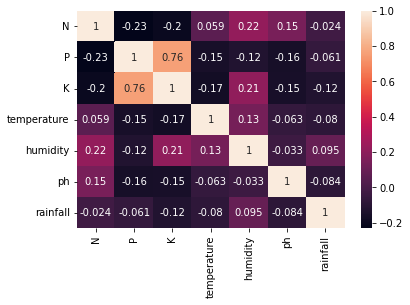

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [15]:
acc = []
model = []

In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

**Decision Tree**

In [17]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  97.89473684210527
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        25
      banana       1.00      1.00      1.00        12
   blackgram       0.95      0.86      0.90        22
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        16
        jute       0.83      1.00      0.90        19
 kidneybeans       1.00      1.00      1.00        26
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        17
   mothbeans       0.88      0.96      0.92        23
   muskmelon       1.00      1.00      1.00        16
      orange       1.00      1.00      1.00        20
  pigeonpeas       1.00      1.00      1.00        18
 pomegranate       1.00      1.00

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [20]:
score

array([0.97894737, 0.97889182, 0.98416887, 0.98153034, 0.97361478])

**Saving trained Decision Tree model**

In [21]:
import pickle
DT_pkl_filename = '/content/sample_data/DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

**Guassian Naive Bayes**

In [22]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9921052631578947
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        25
      banana       1.00      1.00      1.00        12
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        16
        jute       0.86      1.00      0.93        19
 kidneybeans       1.00      1.00      1.00        26
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        16
      orange       1.00      1.00      1.00        20
  pigeonpeas       1.00      1.00      1.00        18
 pomegranate       1.00      1.00 

In [23]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99736842, 0.99472296, 0.99472296, 0.99472296, 0.98944591])

**Saving trained Guassian Naive Bayes model**

In [24]:
import pickle
NB_pkl_filename = '/content/sample_data/NBClassifier.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()

**Support Vector Machine (SVM)**

In [25]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9894736842105263
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        25
      banana       1.00      1.00      1.00        12
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        16
        jute       0.83      1.00      0.90        19
 kidneybeans       1.00      1.00      1.00        26
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        16
      orange       1.00      1.00      1.00        20
  pigeonpeas       1.00      1.00      1.00        18
 pomegranate       1.00      1.00      1.0

In [26]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97631579, 0.97361478, 0.98944591, 0.98680739, 0.98416887])

In [27]:
import pickle
SVM_pkl_filename = '/content/sample_data/SVMClassifier.pkl'
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
SVM_Model_pkl.close()

**Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9552631578947368
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        25
      banana       1.00      1.00      1.00        12
   blackgram       0.88      0.95      0.91        22
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.96      0.98        26
      cotton       0.91      0.87      0.89        23
      grapes       1.00      1.00      1.00        16
        jute       0.76      0.84      0.80        19
 kidneybeans       1.00      1.00      1.00        26
       maize       0.82      0.90      0.86        20
       mango       1.00      1.00      1.00        17
   mothbeans       0.95      0.87      0.91        23
   muskmelon       1.00      1.00      1.00        16
      orange       1.00      1.00      1.00        20
  pigeonpeas       1.00      1.00      1.00        18
 pomegranate       1.00   

In [29]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.96315789, 0.97097625, 0.97097625, 0.96569921, 0.93931398])

**Saving trained Logistic Regression model**

In [30]:
import pickle
LR_pkl_filename = '/content/sample_data/LogisticRegression.pkl'
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
LR_Model_pkl.close()

**Random Forest**

In [31]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9921052631578947
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        25
      banana       1.00      1.00      1.00        12
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        26
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        16
        jute       0.86      1.00      0.93        19
 kidneybeans       1.00      1.00      1.00        26
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        16
      orange       1.00      1.00      1.00        20
  pigeonpeas       1.00      1.00      1.00        18
 pomegranate       1.00      1.00      1.00

In [32]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99473684, 0.99736148, 0.99736148, 0.99472296, 0.98680739])

**Saving trained Random Forest model**

In [33]:
import pickle
RF_pkl_filename = '/content/sample_data/RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
RF_Model_pkl.close()

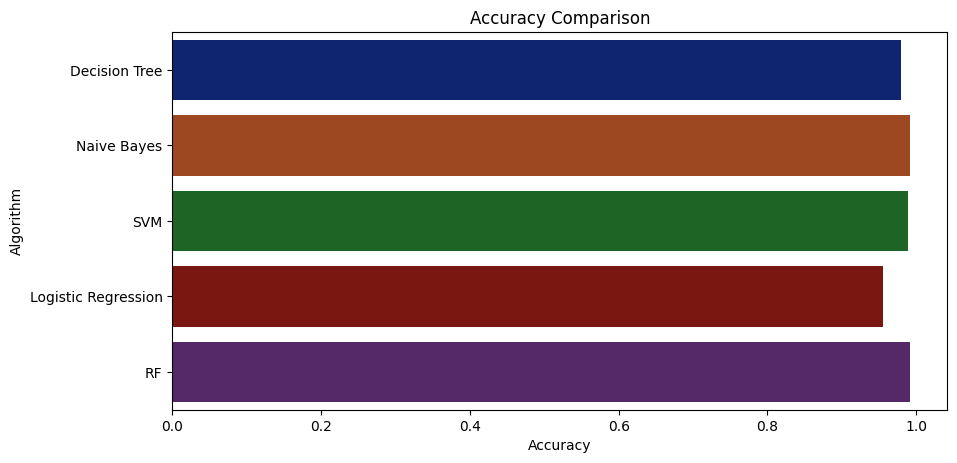

In [37]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [38]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9789473684210527
Naive Bayes --> 0.9921052631578947
SVM --> 0.9894736842105263
Logistic Regression --> 0.9552631578947368
RF --> 0.9921052631578947


**Making a prediction**

In [39]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [40]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [42]:
data = np.array([[90, 42, 42, 20.87, 82.02, 6.5, 202.9]])
prediction = RF.predict(data)
print(prediction)

['rice']
